In [1]:
## path for mdules

import sys
sys.path.insert(0,"/home/albert/lib/python")

## imports

import numpy as np
import xarray as xr
import GriddedData
import time

#- Other modules
import numpy.ma as ma
import WavenumberSpectrum as ws

### palette
import matplotlib.cm as mplcm

seq_cmap = mplcm.Blues
div_cmap = mplcm.seismic

### quick plot
import matplotlib.pyplot as plt

## local/specific imports
import oocgcm
import oocgcm.filtering
import oocgcm.filtering.linearfilters as tf

## histograms
import seaborn as sns
sns.set(color_codes=True)

from decimal import Decimal
import cartopy.crs as ccrs
import matplotlib.ticker as mticker

%matplotlib inline

In [2]:
dirin="/media/extra/DATA/NATL60/NATL60-I/"
gridfile=dirin+"NATL60_v4.1_cdf_mesh_hgr.nc"
!ls $gridfile
grid=xr.open_dataset(gridfile)
navlat= np.squeeze(grid['nav_lat'])
navlon= np.squeeze(grid['nav_lon'])
diri='/media/extra/DATA/NATL60/NATL60-I/'
tmask='NATL60-CJM165.1d_mask_surf_filt-n80-f0.0125.nc'
mask_filt=np.squeeze(xr.open_dataset(diri+tmask)['tmask'])


/media/extra/DATA/NATL60/NATL60-I/NATL60_v4.1_cdf_mesh_hgr.nc


In [13]:
def plot_fine_scale_variance(fig,var,loncrs,latcrs,lon,lat,hpvarm,month,title):
    ''' map of the averaged fine scale variance
    '''
    ax = plt.subplot(111)
    ax.autoscale(tight=True)
    truc=np.array(hpvarm)
    truc[truc==0.]=np.nan
    cont=np.isnan(truc)

    pcolor = ax.pcolormesh(loncrs,latcrs,ma.masked_invalid(var),vmin=0,vmax=2000,cmap=seq_cmap,alpha=1)
    ax.tick_params(labelsize=25)
    ax.contour(lon,lat,cont,alpha=0.5,linewidth=0.000001,antialiased=True)
    cbar = plt.colorbar(pcolor,orientation='horizontal',pad=0.1)
    cbar.ax.tick_params(labelsize=35)
    ax.set_xlabel('Longitude (in degree)',fontsize=20)
    ax.set_ylabel('Latitude (in degree)',fontsize=20)
    cbar.ax.tick_params(labelsize=25)
    plt.text(0,30,month,size=25)
    cbar.set_label(title,fontsize=25)
    return fig


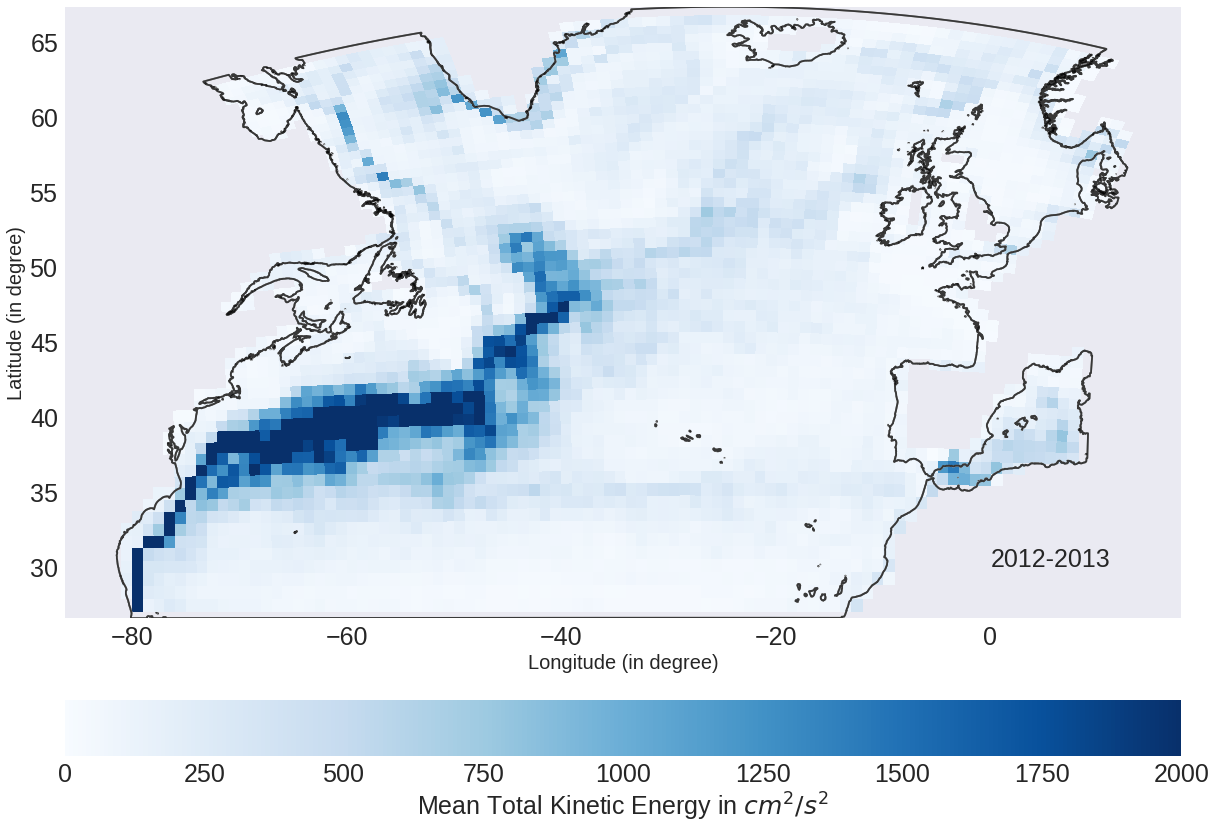

In [14]:
tfiles='/media/extra/DATA/NATL60/NATL60-CJM165-S/EKE/NATL60-CJM165_y2012m10d01-y2013m09d30.1y_KET.nc'
data = xr.open_dataset(tfiles)['vomke']
navlat2=np.array(navlat).squeeze()
navlon2=np.array(navlon).squeeze()
mgrd = GriddedData.grid2D(navlat=navlat2, navlon=navlon2)
crs = GriddedData.grdCoarsener(mgrd,crs_factor=60)
datam=np.nanmean(data,axis=0)
datac = crs.return_ravel(np.asarray(datam))
datacm = np.nanmedian(datac,axis=-3)
latcrs=crs.return_ravel(np.asarray(navlat2))
loncrs=crs.return_ravel(np.asarray(navlon2))
latcrsm=np.mean(latcrs,axis=-3)
loncrsm=np.mean(loncrs,axis=-3)

fig = plt.figure(figsize=(20, 15))
truc=plot_fine_scale_variance(fig,1e4*datacm,loncrsm, latcrsm,navlon,navlat,data[0],'2012-2013','Mean Total Kinetic Energy in $cm^2/s^2$')
plt.savefig("NATL60_KET_annual_mean_coarse.png")


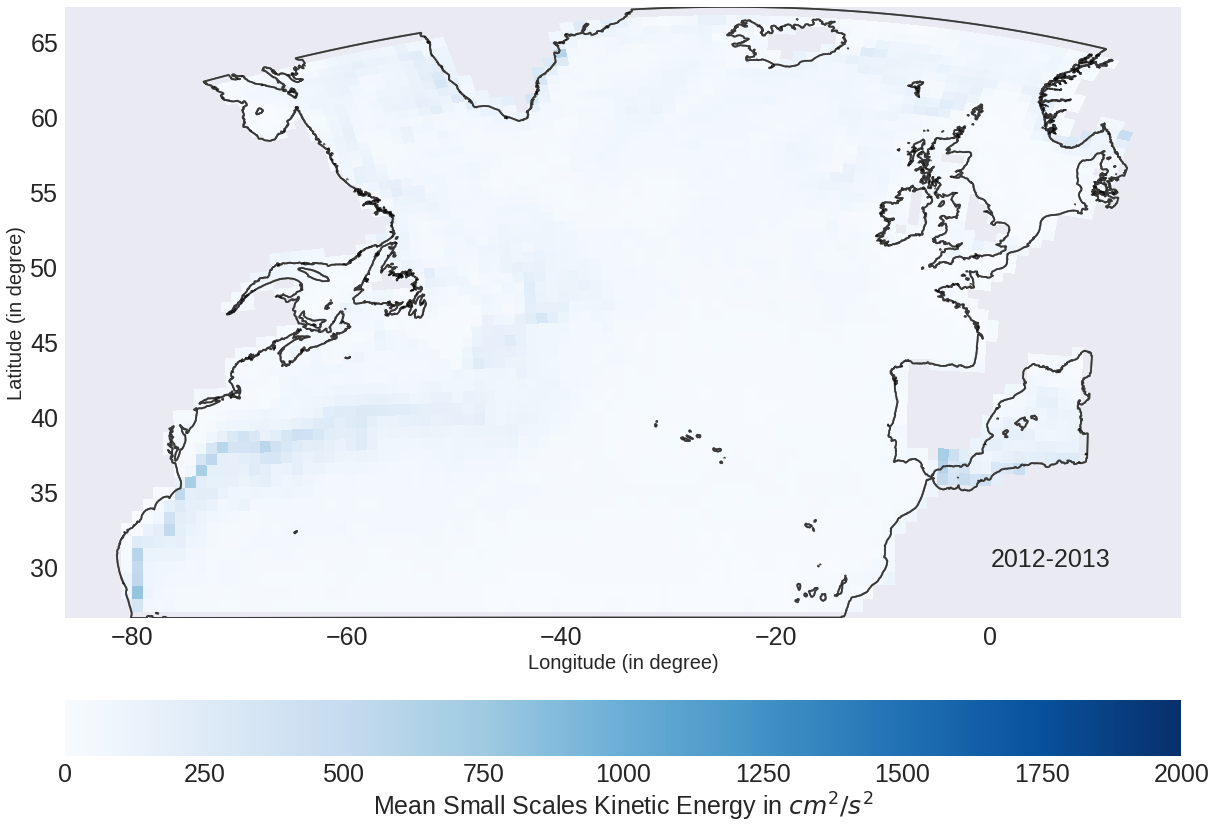

In [15]:
tfiles='/media/extra/DATA/NATL60/NATL60-CJM165-S/EKE/NATL60-CJM165_y2012m10d01-y2013m09d30.1y_KES.nc'
data = xr.open_dataset(tfiles)['vomke']
navlat2=np.array(navlat).squeeze()
navlon2=np.array(navlon).squeeze()
mgrd = GriddedData.grid2D(navlat=navlat2, navlon=navlon2)
crs = GriddedData.grdCoarsener(mgrd,crs_factor=60)
datam=np.nanmean(data,axis=0)
datac = crs.return_ravel(np.asarray(datam))
datacm = np.nanmedian(datac,axis=-3)
latcrs=crs.return_ravel(np.asarray(navlat2))
loncrs=crs.return_ravel(np.asarray(navlon2))
latcrsm=np.mean(latcrs,axis=-3)
loncrsm=np.mean(loncrs,axis=-3)

fig = plt.figure(figsize=(20, 15))
truc=plot_fine_scale_variance(fig,1e4*datacm,loncrsm, latcrsm,navlon,navlat,data[0],'2012-2013','Mean Small Scales Kinetic Energy in $cm^2/s^2$')
plt.savefig("NATL60_KES_annual_mean_coarse.png")
